## Corona Virus Disease (COVID-19)

In this notebook, I will be assessing data from the ChEMBL database to find possible **drug targets** for the **coronavirus**.

Data collected will be preprocessed for further analysis and model building. Information from this notebook can be applied to other possible drug targets like **acetylcholinesterase** for **Alzheimer Disease** and **aromatase** for **breast cancer**.

## ChEMBL Database Overview

ChEMBL is a **vast repository of bioactive molecules**, meticulously curated to accelerate drug discovery and explore the therapeutic landscape. It has a vast collection of over **2.2 million compounds with drug-like properties** and **bioactivity data** of over **18 million records detailing compound effects on biological systems**.

It contains diverse data types which include:
* Binding data (how strongly compounds interact with targets)
* Functional data (compound effects on cellular pathways)
* ADMET data (absorption, distribution, metabolism, excretion, and toxicity)

Data quality is ensured through expert review and the database is regularly updated. ChEMBL empowers researchers to:
* Explore therapeutic possibilities
* Uncover hidden connections between molecules and disease
* Accelerate the development of novel treatments
* Transform the drug discovery landscape

You can access the database through their website, download data for offline use or access programmatically via the web API as used in this notebook. With ChEMBL, a huge oppurtunuty is opened up for innovators and chemists without having to enter the laboratory. Every analysis you do can end up being the savior of a patient tomorrow.

Why not let's *AChEMBL (pun intended!)* and heal the world? 

## Installing the Libraries

To access the ChEMBL databse from python, you have to install the chembl_webresouce_client, a web service client to access the database. 

In [19]:
! pip install chembl_webresource_client rdkit

  Obtaining dependency information for rdkit from https://files.pythonhosted.org/packages/36/cc/bd519528da4b0324a9eecc6c6d486295d609cf6ed926a1ab65200dd81fed/rdkit-2023.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 24.7 MB/s eta 0:00:00:00:0100:01


## Data Collection and Preprocessing

### Importing the Libraries

In [2]:
# Import the necessary libraries
from chembl_webresource_client.new_client import new_client as nc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

pd.set_option('display.max_columns', None)

### Search for Target Proteins

#### Target Protein Search for the Coronavirus

In [3]:
# Target search for the coronavirus

target = nc.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


#### Retrieving Protein Targets

In [4]:
# Get the columns of interest and index bases on the target type of choice, i.e ORGANISM or SINGLE PROTEIN
possible_targets = targets[['pref_name', 'target_chembl_id', 'target_type', 'score']]
possible_targets= possible_targets[possible_targets['target_type']=='SINGLE PROTEIN']
possible_targets

,pref_name,target_chembl_id,target_type,score
6,SARS coronavirus 3C-like proteinase,CHEMBL3927,SINGLE PROTEIN,10.0
8,Replicase polyprotein 1ab,CHEMBL5118,SINGLE PROTEIN,4.0
9,Replicase polyprotein 1ab,CHEMBL4523582,SINGLE PROTEIN,4.0


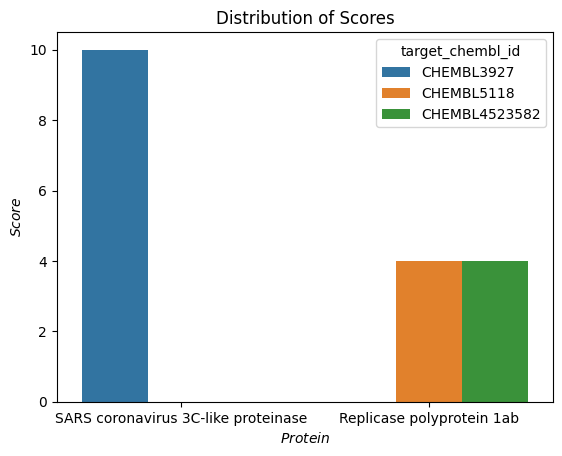

In [5]:
# Plotting an histogram to compare the scores
sns.barplot(data = possible_targets,x= 'pref_name', y='score', hue = 'target_chembl_id')
plt.title("Distribution of Scores")
plt.xlabel("$Protein$")
plt.ylabel("$Score$")

plt.show()

So we get three results with the index 6,8,9

Their names are:

**1. SARS Coronavirus 3C-like Proteinase (3CLpro):**

* **Function:** Plays a crucial role in processing the viral polyprotein into functional proteins, essential for viral replication.
* **Drug Discovery Potential:** Considered a prime target due to its high specificity and critical role in the viral lifecycle. 
* **Advantages:** Multiple inhibitors already developed and undergoing clinical trials, existing structural data facilitates further drug design.
* **Challenges:** Viral mutations can lead to drug resistance, potential off-target effects require careful evaluation.

**2. Replicase Polyprotein 1ab:**

* **Function:** A large viral protein precursor cleaved by 3CLpro into individual non-structural proteins critical for replication and transcription.
* **Drug Discovery Potential:** Targeting specific cleavage sites within 1ab could disrupt viral protein production.
* **Challenges:** Large size and complex structure make it difficult to identify druggable sites, potential for multiple off-target effects due to diverse roles of its cleaved proteins.

**3. Replicase Polyprotein 1ab Processing Enzymes:**

* **Function:** Include papain-like protease (PLpro) and nsp14-nsp10, responsible for cleaving specific sites within 1ab.
* **Drug Discovery Potential:** Targeting these enzymes could offer an alternative strategy to disrupt viral protein production.
* **Challenges:** Relatively less studied compared to 3CLpro, limited structural data complicates inhibitor design.

 From the score and the analysis done, we can see that the **SARS Coronavirus 3C-like Proteinase (3CLpro)** is a better protein target having a score of **10.0** and the others having a score of **4.0**

#### Select and retrieve the bioactivity data of the SARS Coronavirus 3C-like Proteinase (3CLpro) - Entry 7 

Since this protein is now our new target, we will assign it to a **target_selection** variable. Note that while it is the **seventh entry**, it's **index is 6**

In [6]:
# Define the selected target
target_selection = targets.target_chembl_id[6]
target_selection

'CHEMBL3927'

In [7]:
activity = nc.activity
results = activity.filter(target_chembl_id = target_selection).filter(standard_type = 'IC50')
results_frame = pd.DataFrame.from_dict(results)
results_frame.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,None,None,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,None,CHEMBL187579,5.14,0,http://www.openphacts.org/units/Nanomolar,384103,=,1,1,=,None,IC50,nM,None,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,None,CHEMBL188487,5.03,0,http://www.openphacts.org/units/Nanomolar,383984,=,1,1,=,None,IC50,nM,None,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,None,CHEMBL185698,4.87,0,http://www.openphacts.org/units/Nanomolar,384106,=,1,1,=,None,IC50,nM,None,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,None,None,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,None,CHEMBL426082,4.88,0,http://www.openphacts.org/units/Nanomolar,384075,=,1,1,=,None,IC50,nM,None,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],None,None,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,None,CHEMBL187717,5.70,0,http://www.openphacts.org/units/Nanomolar,384234,=,1,1,=,None,IC50,nM,None,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [8]:
results_frame.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [9]:
results_frame.standard_type.unique()

array(['IC50'], dtype=object)

#### Saving the bioactivity IC50 dataframe in a bioactivity.csv

IC50 stands for **half maximal inhibitory concentration**. It's a measure of the potency of a substance in inhibiting a specific biological or biochemical function. In simpler terms, it tells you how much of the substance is needed to inhibit a process by half.

Here's a breakdown of what IC50 means:

* **Half maximal:** It refers to the concentration at which the substance inhibits 50% of the activity compared to the control (no inhibitor present).
* **Inhibitory:** It indicates that the substance reduces the activity of a process.
* **Concentration:** It refers to the amount of the substance present in a specific volume (e.g., moles per liter).
* **Biological or biochemical function:** This could be anything from enzyme activity to cell growth to viral replication.

**Why is IC50 important?**

IC50 is a crucial metric in various fields, including:

* **Drug discovery:** It helps researchers identify and compare the potency of potential drug candidates. Lower IC50 values indicate higher potency, meaning less of the drug is needed to achieve the desired effect.
* **Pharmacology:** It allows scientists to understand the mechanisms of action of drugs and other bioactive molecules.
* **Toxicology:** It helps assess the potential toxicity of a substance by measuring its inhibitory effect on essential cellular processes.

**Understanding IC50 values:**

* Lower IC50 values indicate a more potent inhibitor.
* Higher IC50 values indicate a less potent inhibitor.
* Comparing IC50 values across different substances allows researchers to rank their potency for a specific function.

**The Importance of IC50 in Assessing Drugs Targeting SARS-CoV-2 3CLpro**

Why is IC50 important in assessing drug targets for the SARS-CoV-2 3CLpro? 

**1. 3CLpro: A Prime Target for Antiviral Drugs:**



The 3CLpro, also known as Mpro, is a cysteine protease responsible for cleaving viral polyproteins into functional proteins essential for viral replication. Inhibiting this enzyme disrupts the virus's life cycle, potentially halting its spread and infection.

**2. IC50: Quantifying Potency against 3CLpro:**

The IC50 value tells us how much of a drug is needed to inhibit 50% of the 3CLpro activity. Lower IC50 values indicate **higher potency**, meaning less of the drug is needed to achieve the desired effect. This is crucial for several reasons:

* **Reduced Dosage:** Lower IC50 translates to lower required drug doses, potentially minimizing side effects and improving patient compliance.
* **Efficacy against Resistant Variants:** Some SARS-CoV-2 variants possess mutations affecting 3CLpro. Drugs with lower IC50 values might be more effective against these variants due to their higher potency.
* **Comparison of Drug Candidates:** In drug discovery, researchers compare IC50 values of various candidate drugs to identify the most potent ones for further development.

**3. Factors Influencing IC50:**

It's important to note that IC50 can be influenced by various factors, including:

* **Experimental conditions:** Cell type, incubation time, and assay method used can affect IC50 values.
* **Specificity:** A drug's potential off-target effects on other proteins can influence its overall effectiveness.
* **Drug properties:** Factors like solubility, absorption, and metabolism can impact how the drug reaches its target and exerts its effect.

**4. IC50 and Drug Development Pipeline:**

While IC50 is a valuable metric, it's just one step in the drug development process. Other crucial factors like safety, efficacy in animal models, and human clinical trials play a significant role in bringing a potential drug to market.

**5. Examples of Drugs Targeting 3CLpro:**

Several drugs targeting 3CLpro are currently in various stages of development or clinical trials. Some examples include:

* **Nirmatrelvir (Paxlovid):** Approved for emergency use authorization in the US, it shows promising antiviral activity against SARS-CoV-2.
* **Molnupiravir (Lagevrio):** Another FDA-approved antiviral with reported effectiveness against the virus.
* **PF-07321332:** A potent 3CLpro inhibitor currently undergoing Phase III clinical trials.

**Conclusion:**

The IC50 value remains a critical tool in assessing the potency of drugs targeting SARS-CoV-2 3CLpro. By understanding its significance and limitations, researchers can effectively utilize this metric to accelerate the development of safe and effective antiviral drugs for COVID-19. 

*Also, considering the fact that the protein needs expression for the virus to survive, it makes sense to synthesize a drug to inhibit it's function. This is the reason why the IC%50 metric is being utilized.*

As I continue through this project,the goal is to find a ligand that can effectively inhibit this protein.

In [10]:
# Save the resulting bioactivity data to a CSV file for further analysis

results_frame.to_csv('bioactivity_data.csv', index=False, na_rep='None')

# Analysis and Data Pre-processing of the bioactivity data

In [11]:
bioactivity_df = pd.read_csv('/kaggle/working/bioactivity_data.csv')
bioactivity_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,NaN,CHEMBL187579,5.14,0,http://www.openphacts.org/units/Nanomolar,384103,=,1,1,=,NaN,IC50,nM,NaN,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,NaN,CHEMBL188487,5.03,0,http://www.openphacts.org/units/Nanomolar,383984,=,1,1,=,NaN,IC50,nM,NaN,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,NaN,CHEMBL185698,4.87,0,http://www.openphacts.org/units/Nanomolar,384106,=,1,1,=,NaN,IC50,nM,NaN,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,NaN,CHEMBL426082,4.88,0,http://www.openphacts.org/units/Nanomolar,384075,=,1,1,=,NaN,IC50,nM,NaN,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,NaN,CHEMBL187717,5.70,0,http://www.openphacts.org/units/Nanomolar,384234,=,1,1,=,NaN,IC50,nM,NaN,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00


## Handling missing values

If any compound has a missing value for the standard value column, then it should be dropped

In [13]:
bioactivity_df = bioactivity_df[bioactivity_df.standard_value.notna()]
bioactivity_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,NaN,CHEMBL187579,5.14,0,http://www.openphacts.org/units/Nanomolar,384103,=,1,1,=,NaN,IC50,nM,NaN,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,NaN,CHEMBL188487,5.03,0,http://www.openphacts.org/units/Nanomolar,383984,=,1,1,=,NaN,IC50,nM,NaN,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,NaN,CHEMBL185698,4.87,0,http://www.openphacts.org/units/Nanomolar,384106,=,1,1,=,NaN,IC50,nM,NaN,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,NaN,CHEMBL426082,4.88,0,http://www.openphacts.org/units/Nanomolar,384075,=,1,1,=,NaN,IC50,nM,NaN,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,NaN,CHEMBL187717,5.70,0,http://www.openphacts.org/units/Nanomolar,384234,=,1,1,=,NaN,IC50,nM,NaN,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00


### 

### Labeling compounds as either active, intermediate, or inactive.

For the bioactivity data (represented by the IC50), compounds with values **less than 1000 nM** will be to be **active**, those **above 10000 nM** will be considered **inactive** and those **inbetween** will be labeled **intermediate**.

Reason being that a low value means we need less of the drug to inhibit the protein and vice versa.

In [14]:
bioactivity_class = []

# write the condition to label the molecules

for i in bioactivity_df.standard_value:
    if float(i)<=1000:
        bioactivity_class.append('active')
    elif float(i)>=10000:
        bioactivity_class.append('inactive')
    else:
        bioactivity_class.append('intermediate')

In [16]:
bioactivity_df['bioactivity_class'] = bioactivity_class
bioactivity_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,NaN,CHEMBL187579,5.14,0,http://www.openphacts.org/units/Nanomolar,384103,=,1,1,=,NaN,IC50,nM,NaN,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20,intermediate
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,NaN,CHEMBL188487,5.03,0,http://www.openphacts.org/units/Nanomolar,383984,=,1,1,=,NaN,IC50,nM,NaN,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40,intermediate
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,NaN,CHEMBL185698,4.87,0,http://www.openphacts.org/units/Nanomolar,384106,=,1,1,=,NaN,IC50,nM,NaN,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50,inactive
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,NaN,CHEMBL426082,4.88,0,http://www.openphacts.org/units/Nanomolar,384075,=,1,1,=,NaN,IC50,nM,NaN,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11,inactive
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],NaN,NaN,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,NaN,CHEMBL187717,5.70,0,http://www.openphacts.org/units/Nanomolar,384234,=,1,1,=,NaN,IC50,nM,NaN,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00,intermediate


### Picking the parameters of interest and Saving the resultant table in a .csv file

In [18]:
columns_of_interest = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'bioactivity_class']
bioactivity_preprocessed_data = bioactivity_df[columns_of_interest]
bioactivity_preprocessed_data.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


In [22]:
bioactivity_preprocessed_data.to_csv('bioactivity_preprocessed_data', index=False)